# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
# # for code writing and debugging
# cities_small = []

# for i in range(5):
#     cities_small.append(cities[i])

# cities_small

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Generate a new empty Pandas dataframe with "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", and "Wind Speed" columns
cities_pd = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

# Preview "cities_pd"
cities_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [5]:
# Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Use "city_counter" to store the quantity of eligible calls for cities
city_counter = 0

# Loop through "cities"
for city in cities:
    # Build query URL
    query = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # Get city data
    response = requests.get(query)
    
    # Convert "response" to JSON format
    hit = response.json()
    
    # Make exception with "try/except" block
    try:
        
        # Add 1 to "city_counter" if the name of the query city exists
        if hit["name"]:
            city_counter += 1
        # Print out the number and name of the city being processed
        print(f"Processing Record {city_counter % 50} of Set {1 + int(city_counter / 50)} | {city}")
            
        # Note that the length of "cities_pd" immediately adds up once a value is added in a column
        # Use "im" (intermediate) to store the length of "cities_pd" so that new values will be added in the same row for each column within the same iteration        
        im = len(cities_pd.index)

        # Append each value to its designated column in "cities_pd" based on the structure tree of the returning call of the city
        cities_pd.loc[im, "City"] = hit["name"]
        cities_pd.loc[im, "Cloudiness"] = hit["clouds"]["all"]
        cities_pd.loc[im, "Country"] = hit["sys"]["country"]
        cities_pd.loc[im, "Date"] = str(datetime.utcfromtimestamp(hit["dt"]))   # Convert the 10-digit date to readable format          
        cities_pd.loc[im, "Humidity"] = hit["main"]["humidity"]
        cities_pd.loc[im, "Lat"] = hit["coord"]["lat"]
        cities_pd.loc[im, "Lng"] = hit["coord"]["lon"]
        cities_pd.loc[im, "Max Temp"] = hit["main"]["temp_max"]
        cities_pd.loc[im, "Wind Speed"] = hit["wind"]["speed"]
    
    # Make exceptions once "KeyError" is encountered (city name does not exist)
    except (KeyError):
        print("City not found. Skipping ...")

    # Once the last city in "cities" list has been called ...
    if city == cities[-1]:
        # Print out the following, indicating the completion of data retrieval
        print("-" *30)
        print("Data Retrieval Complete")
        print("-" *30)
        
    # Free user gets a maximum calls of 60 per minute, which equals to 1 call per second (OpenWeatherMap policy)
    time.sleep(1.1)    

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
City not found. Skipping ...
Processing Record 3 of Set 1 | clonakilty
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | kodiak
City not found. Skipping ...
Processing Record 7 of Set 1 | guymon
Processing Record 8 of Set 1 | arraial do cabo
City not found. Skipping ...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | uryupinsk
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | grindavik
City not found. Skipping ...
Processing Record 13 of Set 1 | sinnamary
City not found. Skipping ...
Processing Record 14 of Set 1 | saint marys
City not found. Skipping ...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | upernavik
City not found. Skipping ...
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | pangnirtung
Pr

Processing Record 33 of Set 4 | joshimath
Processing Record 34 of Set 4 | santa vitoria do palmar
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | aviles
Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | eatonton
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | waitati
Processing Record 41 of Set 4 | prince george
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | lethem
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | pevek
City not found. Skipping ...
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | spornoye
Processing Record 0 of Set 5 | jining
Processing Record 1 of Set 5 | nemuro
City not found. Skipping ...
Processing Record 2 of Set 5 | abha
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | s

Processing Record 16 of Set 8 | zatoka
Processing Record 17 of Set 8 | sao jose da coroa grande
Processing Record 18 of Set 8 | husavik
Processing Record 19 of Set 8 | mehamn
City not found. Skipping ...
Processing Record 20 of Set 8 | coihaique
Processing Record 21 of Set 8 | pandamatenga
Processing Record 22 of Set 8 | placido de castro
Processing Record 23 of Set 8 | bilma
Processing Record 24 of Set 8 | baculin
Processing Record 25 of Set 8 | male
Processing Record 26 of Set 8 | lewistown
Processing Record 27 of Set 8 | rio verde de mato grosso
Processing Record 28 of Set 8 | arbazh
Processing Record 29 of Set 8 | shenjiamen
Processing Record 30 of Set 8 | trelew
Processing Record 31 of Set 8 | surt
Processing Record 32 of Set 8 | theunissen
Processing Record 33 of Set 8 | bamiantong
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | redmond
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | barbacoas
Processing Record 38 of Set 8 | vanimo

Processing Record 47 of Set 11 | ankang
Processing Record 48 of Set 11 | kovernino
Processing Record 49 of Set 11 | angoram
Processing Record 0 of Set 12 | mao
Processing Record 1 of Set 12 | ancona
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Remove cities with missing data if any
cities_pd = cities_pd.dropna(how="any")

# Count unique values in columns
cities_pd.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [7]:
# Preview "cities_pd"
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,2019-03-24 03:00:00,76,-54.81,-68.31,51.8,20.8
1,Busselton,12,AU,2019-03-24 03:40:17,29,-33.64,115.35,72,15.79
2,Clonakilty,40,IE,2019-03-24 03:00:00,80,51.62,-8.87,39.2,5.82
3,Oranjemund,92,ZA,2019-03-24 03:42:45,92,-28.55,16.43,62.22,2.48
4,Dingle,0,PH,2019-03-24 03:41:59,55,11,122.67,84.63,15.68


In [8]:
# Write "cities_pd" to csv file
cities_pd.to_csv(output_data_file, encoding="utf-8", index=False)

In [9]:
# Store "Date" info. of the first city in "cities_pd" to "date_list"
date_list = [cities_pd["Date"][0][:10]]

# View the first value in "date_list"
date_list[0]

'2019-03-24'

In [10]:
# Loop through "cities_pd"
for i in range(len(cities_pd)):
    
    # Obtain "yyyy-mm-dd" info. from each city row and check if it is equal to the first value in "date_list"
    if cities_pd["Date"][i][:10] != date_list[0]:
        
        # If there is any different date, append it to "date_list"
        date_list.append(cities_pd["Date"][i][:10])

# View "date_list"
date_list

['2019-03-24']

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

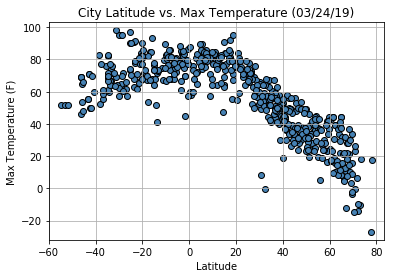

In [11]:
# Generate scatter plot on Latitude vs. Temperature
plt.scatter(cities_pd["Lat"], cities_pd["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_pd["Lat"]) - 5, max(cities_pd["Lat"]) + 5)
plt.ylim(min(cities_pd["Max Temp"]) - 5, max(cities_pd["Max Temp"]) + 5)

# Create title
plt.title(f"City Latitude vs. Max Temperature ({date_list[0][5:7]}/{date_list[0][8:]}/{date_list[0][2:4]})")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_temperature.png", dpi=300)

# Show figure
plt.show()

#### Latitude vs. Humidity Plot

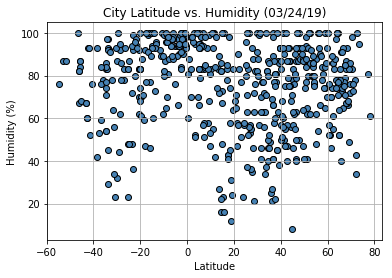

In [12]:
# Generate scatter plot on Latitude vs. Humidity
plt.scatter(cities_pd["Lat"], cities_pd["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_pd["Lat"]) - 5, max(cities_pd["Lat"]) + 5)
plt.ylim(min(cities_pd["Humidity"]) - 5, max(cities_pd["Humidity"]) + 5)

# Create title
plt.title(f"City Latitude vs. Humidity ({date_list[0][5:7]}/{date_list[0][8:]}/{date_list[0][2:4]})")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_humidity.png", dpi=300)

# Show figure
plt.show()

#### Latitude vs. Cloudiness Plot

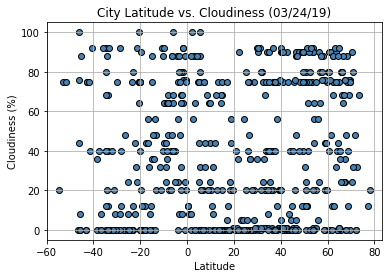

In [13]:
# Generate scatter plot on Latitude vs. Cloudiness
plt.scatter(cities_pd["Lat"], cities_pd["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_pd["Lat"]) - 5, max(cities_pd["Lat"]) + 5)
plt.ylim(min(cities_pd["Cloudiness"]) - 5, max(cities_pd["Cloudiness"]) + 5)

# Create title
plt.title(f"City Latitude vs. Cloudiness ({date_list[0][5:7]}/{date_list[0][8:]}/{date_list[0][2:4]})")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_cloudiness.png", dpi=300)

# Show figure
plt.show()

#### Latitude vs. Wind Speed Plot

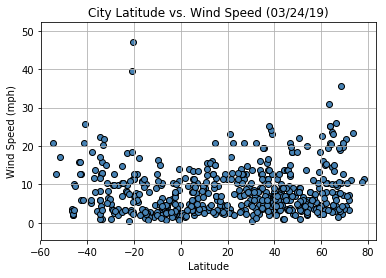

In [14]:
# Generate scatter plot on Latitude vs. Wind Speed
plt.scatter(cities_pd["Lat"], cities_pd["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_pd["Lat"]) - 5, max(cities_pd["Lat"]) + 5)
plt.ylim(min(cities_pd["Wind Speed"]) - 5, max(cities_pd["Wind Speed"]) + 5)

# Create title
plt.title(f"City Latitude vs. Wind Speed ({date_list[0][5:7]}/{date_list[0][8:]}/{date_list[0][2:4]})")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_Wind Speed.png", dpi=300)

# Show figure
plt.show()